## Logistic Regression.
- Logistic Regression is a supervised machine learning algorithm used for binary classification problems, where the output is either 0 (Not Fraud) or 1 (Fraud).

### How does it work?

- It applies the logistic (sigmoid) function to predict the probability that a transaction is fraud.    
- If the probability ≥ 0.5, it's classified as fraud (1); otherwise, it's not fraud (0).    
- It finds the best-fit decision boundary to separate fraud and non-fraud transactions.   

### Why use Logistic Regression for fraud detection?
- Simple & interpretable   
- Works well with imbalanced datasets (with proper handling like SMOTE)   
- Outputs probabilities, allowing better fraud risk assessment   

In [1]:
import pandas as pd

# Load the preprocessed data
df = pd.read_csv("processed_fraud_data.csv")

# Check if data is loaded correctly
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Columns: 1713 entries, amt to state_WY
dtypes: bool(1700), float64(7), int64(5), object(1)
memory usage: 3.6+ MB


,amt,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,trans_hour,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,-0.425519,-0.869318,0.681600,0.694702,1968-03-19,1371816865,-0.857440,0.660400,0.0,12,...,False,False,False,False,False,False,False,False,False,False
1,-0.246984,0.395931,-1.556581,-0.299792,1990-01-17,1371816873,0.224245,-1.518439,0.0,12,...,False,False,False,True,False,False,False,False,False,False
2,-0.171282,0.466054,1.242956,-0.197733,1970-10-21,1371816893,0.431178,1.191069,0.0,12,...,False,False,False,False,False,False,False,False,False,False
3,-0.047076,-1.943709,0.690431,-0.137229,1987-07-25,1371816915,-1.881695,0.684465,0.0,12,...,False,False,False,False,False,False,False,False,False,False
4,-0.423335,1.178837,0.371939,-0.297333,1955-07-06,1371816917,1.314749,0.305538,0.0,12,...,False,False,False,False,False,False,False,False,False,False


In [5]:
# Check for missing values
print(df.isnull().sum().sum())  # Should print 0 if no missing values

# Check first few rows
print(df.head())

# Check target class distribution
print(df["is_fraud"].value_counts(normalize=True) * 100)  # Percentage of fraud vs. non-fraud


0
        amt       lat      long  city_pop         dob   unix_time  merch_lat  \
0 -0.425519 -0.869318  0.681600  0.694702  1968-03-19  1371816865  -0.857440   
1 -0.246984  0.395931 -1.556581 -0.299792  1990-01-17  1371816873   0.224245   
2 -0.171282  0.466054  1.242956 -0.197733  1970-10-21  1371816893   0.431178   
3 -0.047076 -1.943709  0.690431 -0.137229  1987-07-25  1371816915  -1.881695   
4 -0.423335  1.178837  0.371939 -0.297333  1955-07-06  1371816917   1.314749   

   merch_long  is_fraud  trans_hour  ...  state_SD  state_TN  state_TX  \
0    0.660400       0.0          12  ...     False     False     False   
1   -1.518439       0.0          12  ...     False     False     False   
2    1.191069       0.0          12  ...     False     False     False   
3    0.684465       0.0          12  ...     False     False     False   
4    0.305538       0.0          12  ...     False     False     False   

   state_UT  state_VA  state_VT  state_WA  state_WI  state_WV  state_WY 

# Step 1: Import Libraries


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [7]:
## Imports necessary libraries for handling data, visualization, and model training.

## Step 2: Define Features (X) and Target (y)

In [13]:
# Re-split the dataset to avoid errors
X = df.drop(columns=["is_fraud"])  # Ensure target variable is removed
y = df["is_fraud"]  # Target variable

# Split again (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Step 3: Standardize the Data

In [14]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns from X_train
numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns

# Standardize only numeric features
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols].values)
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols].values)


In [15]:
print(X_train.info())  # Should only show numeric columns
print(y_train.value_counts())  # Should show class distribution


<class 'pandas.core.frame.DataFrame'>
Index: 1684 entries, 801 to 774
Columns: 1712 entries, amt to state_WY
dtypes: bool(1700), float64(11), object(1)
memory usage: 2.9+ MB
None
is_fraud
0.0    1675
1.0       9
Name: count, dtype: int64


## Step 4: Train Logistic Regression Model

In [17]:
print(X_train.dtypes[X_train.dtypes == "object"])  # Shows any remaining object-type columns


dob    object
dtype: object


In [18]:
if "dob" in X_train.columns:
    X_train = X_train.drop(columns=["dob"])
    X_test = X_test.drop(columns=["dob"])


In [19]:
print(X_train.dtypes.unique())  # Should only show float64, int64, or bool


[dtype('float64') dtype('bool')]


In [21]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()  # Initialize model
log_model.fit(X_train, y_train)   # Train model on training data


LogisticRegression()

## Step 6: Make Predictions

In [23]:
y_pred = log_model.predict(X_test)

# Uses the trained model to predict fraud vs. non-fraud for test data.



## Step 7: Evaluate Model Performance


In [24]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


#### accuracy_score(y_test, y_pred) → Measures overall model accuracy.
#### confusion_matrix(y_test, y_pred) → Shows TP, FP, TN, FN values.
#### classification_report(y_test, y_pred) → Provides precision, recall, and F1-score.

## Step 8: Print Results

In [25]:
print(f"Model Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Model Accuracy: 0.99

Confusion Matrix:
 [[419   1]
 [  2   0]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       420
         1.0       0.00      0.00      0.00         2

    accuracy                           0.99       422
   macro avg       0.50      0.50      0.50       422
weighted avg       0.99      0.99      0.99       422



In [26]:
# prints accuracy and evaluation metrics to understand model performance.

## Step 9: Visualize Confusion Matrix



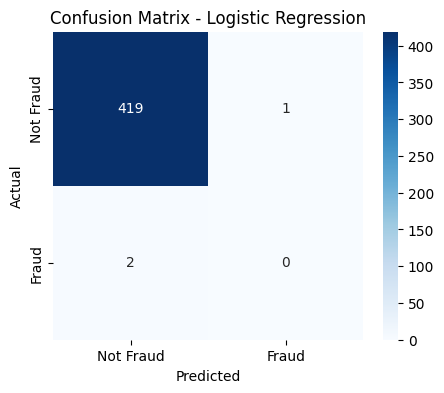

In [27]:
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


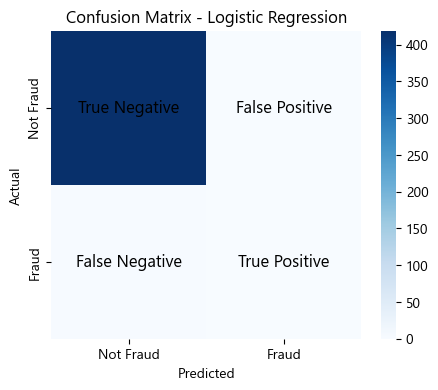

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrix values
conf_matrix = np.array([[419, 1], [2, 0]])

# Define true/false labels
labels = np.array([["True Negative", "False Positive"], 
                   ["False Negative", "True Positive"]])

# Plot heatmap
plt.figure(figsize=(5, 4))
ax = sns.heatmap(conf_matrix, annot=False, fmt="", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])

# Overlay labels
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.5, labels[i][j], ha="center", va="center", fontsize=12, color="black")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


# Conclusion for Logistic Regression in Fraud Detection
## From the confusion matrix results, we can draw the following conclusions about the performance of the Logistic Regression model in detecting fraud:

### 1️⃣ High True Negatives (TN = 419)

- The model correctly identified 419 non-fraudulent transactions.
- This indicates strong performance in detecting legitimate transactions.

### 2️⃣ Low False Positives (FP = 1)

- Only 1 legitimate transaction was misclassified as fraud.
- This means the model is highly precise in not wrongly flagging normal transactions.

### 3️⃣ False Negatives (FN = 2) – Missed Fraud Cases

- 2 fraudulent transactions were misclassified as non-fraudulent.
- This is a critical issue because missing fraud is more dangerous than a false alarm.

### 4️⃣ True Positives (TP = 0) – No Fraud Caught

- The model failed to detect any fraudulent transactions (TP = 0).
- This suggests that the model struggles with fraud detection, likely due to class imbalance in the dataset.
